In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset

df = pd.read_csv('customer_segmentation_data.csv')

In [8]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


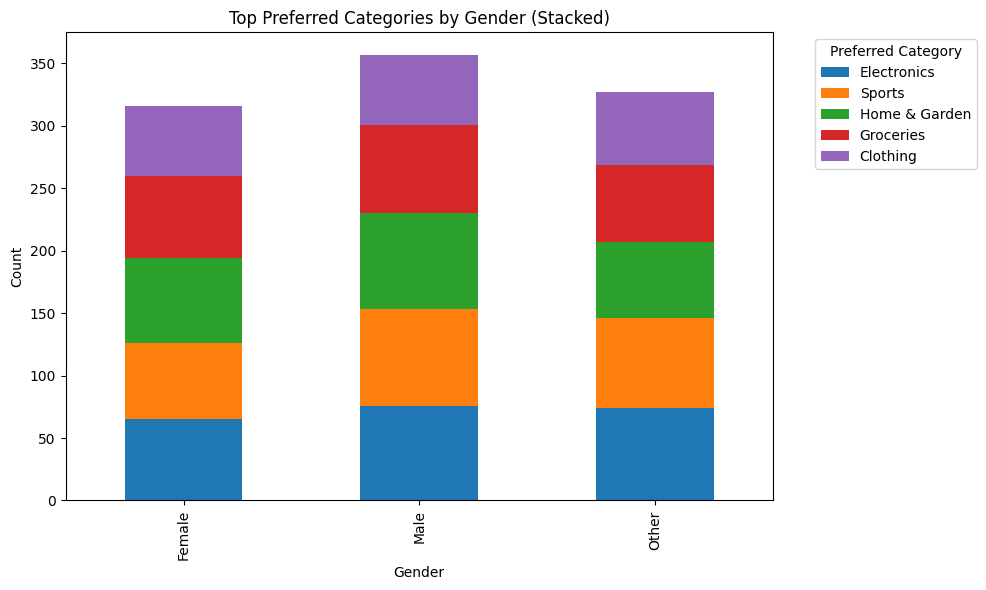

In [9]:
def preferred_categories(df):
    """
    Plots a stacked bar chart showing the top preferred categories by gender.

    Parameters:
    df (DataFrame): The input DataFrame containing 'gender' and 'preferred_category' columns.
    """

    # Group the data by gender and preferred category, then count the occurrences
    category_counts = df.groupby(['gender', 'preferred_category']).size().unstack(fill_value=0)

    # Identify the top 5 most popular categories across all genders
    top_categories = category_counts.sum(axis=0).sort_values(ascending=False).head(5).index

    # Filter the category counts to only include the top categories
    category_counts = category_counts[top_categories]

    # Plot the stacked bar chart
    category_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Add title and axis labels
    plt.title('Top Preferred Categories by Gender (Stacked)')
    plt.xlabel('Gender')
    plt.ylabel('Count')

    plt.legend(title='Preferred Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    
preferred_categories(df)

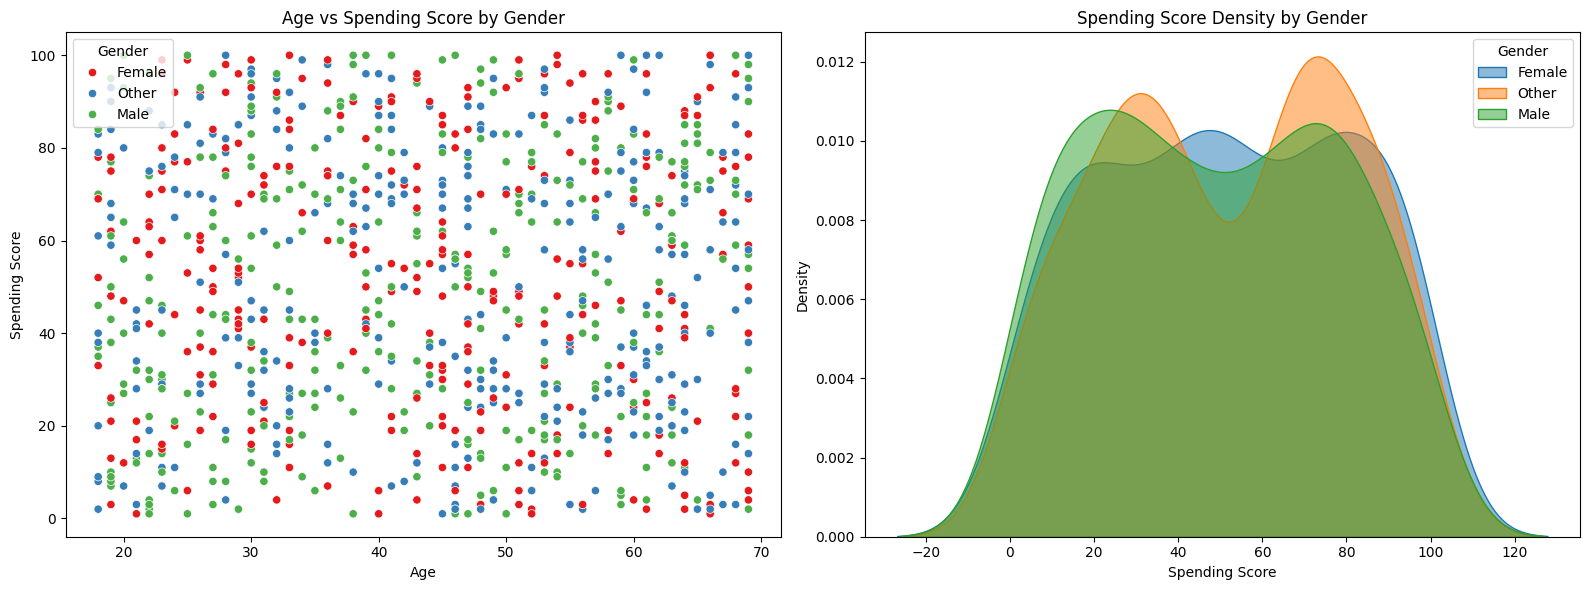

In [10]:
def spending_score_analysis(df):
    """
    Creates a side-by-side visualization:
    1. Scatter plot of Age vs Spending Score, differentiated by gender.
    2. Density plot of Spending Score distribution by gender.

    Parameters:
    df (DataFrame): The input DataFrame containing 'age', 'spending_score', and 'gender' columns.
    """

    # Create a 1x2 subplot grid
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Scatter plot for Age vs Spending Score colored by gender
    sns.scatterplot(data=df, x='age', y='spending_score', hue='gender', palette='Set1', ax=axes[0])
    axes[0].set_title('Age vs Spending Score by Gender')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Spending Score')
    axes[0].legend(title='Gender')

    # Density plot for Spending Score distribution by gender
    for gender in df['gender'].unique():
        subset = df[df['gender'] == gender]
        sns.kdeplot(data=subset, x='spending_score', fill=True, alpha=0.5, label=gender, ax=axes[1])

    axes[1].set_title('Spending Score Density by Gender')
    axes[1].set_xlabel('Spending Score')
    axes[1].set_ylabel('Density')
    axes[1].legend(title='Gender')

    plt.tight_layout()
    plt.show()
    
    
spending_score_analysis(df)

In [11]:
df['spending_score'].describe()

count    1000.000000
mean       50.685000
std        28.955175
min         1.000000
25%        26.000000
50%        50.000000
75%        76.000000
max       100.000000
Name: spending_score, dtype: float64

/tmp/ipykernel_173889/2057317395.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='purchase_frequency', palette='Set3', ax=axes[0])
/tmp/ipykernel_173889/2057317395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='income', palette='Set2', ax=axes[1])


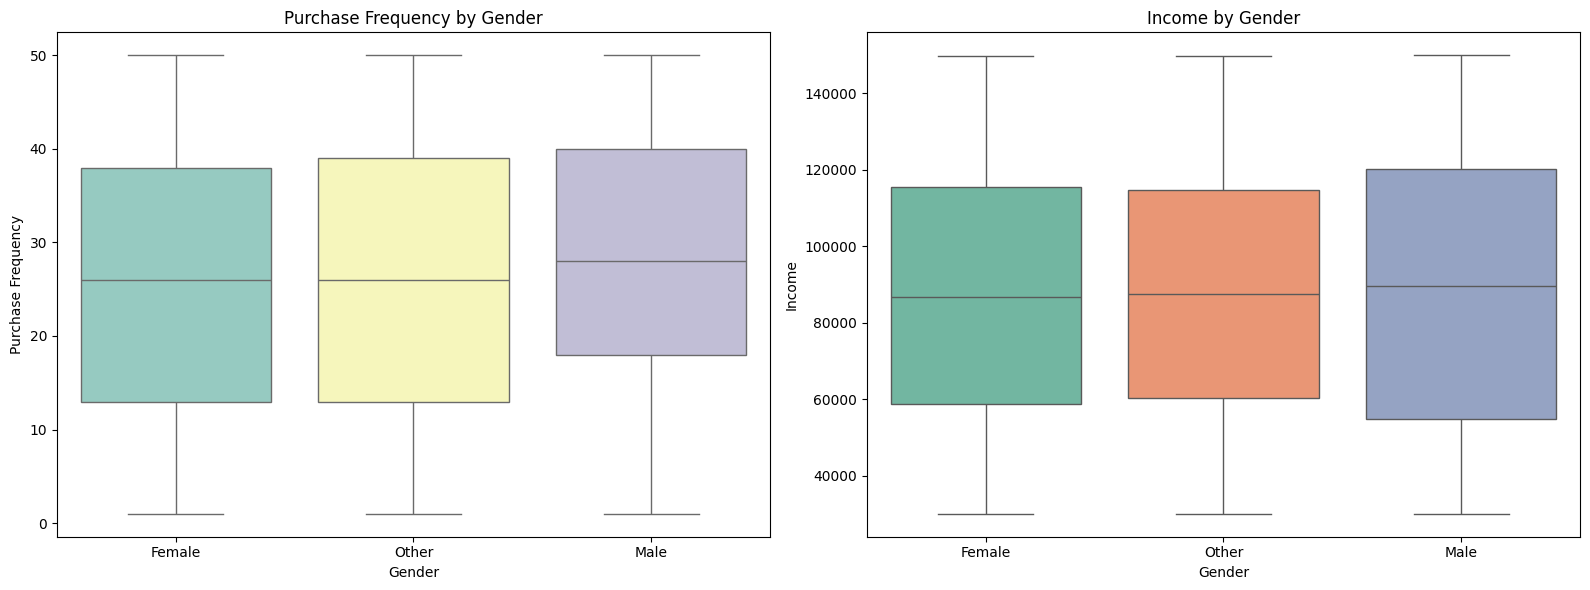

In [12]:
def box_plots_analysis(df):
    """
    Creates two side-by-side box plots:
    1. Box plot showing purchase frequency distribution across genders.
    2. Box plot showing income distribution across genders.

    Parameters:
    df (DataFrame): The input DataFrame containing 'gender', 'purchase_frequency', and 'income' columns.
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Box plot for purchase frequency by gender
    sns.boxplot(data=df, x='gender', y='purchase_frequency', palette='Set3', ax=axes[0])
    axes[0].set_title('Purchase Frequency by Gender')
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel('Purchase Frequency')

    # Box plot for income by gender
    sns.boxplot(data=df, x='gender', y='income', palette='Set2', ax=axes[1])
    axes[1].set_title('Income by Gender')
    axes[1].set_xlabel('Gender')
    axes[1].set_ylabel('Income')

    plt.tight_layout()
    plt.show()

box_plots_analysis(df)

In [13]:
df['purchase_frequency'].describe()

count    1000.000000
mean       26.596000
std        14.243654
min         1.000000
25%        15.000000
50%        27.000000
75%        39.000000
max        50.000000
Name: purchase_frequency, dtype: float64

In [14]:
df['income'].describe()

count      1000.000000
mean      88500.800000
std       34230.771122
min       30004.000000
25%       57911.750000
50%       87845.500000
75%      116110.250000
max      149973.000000
Name: income, dtype: float64

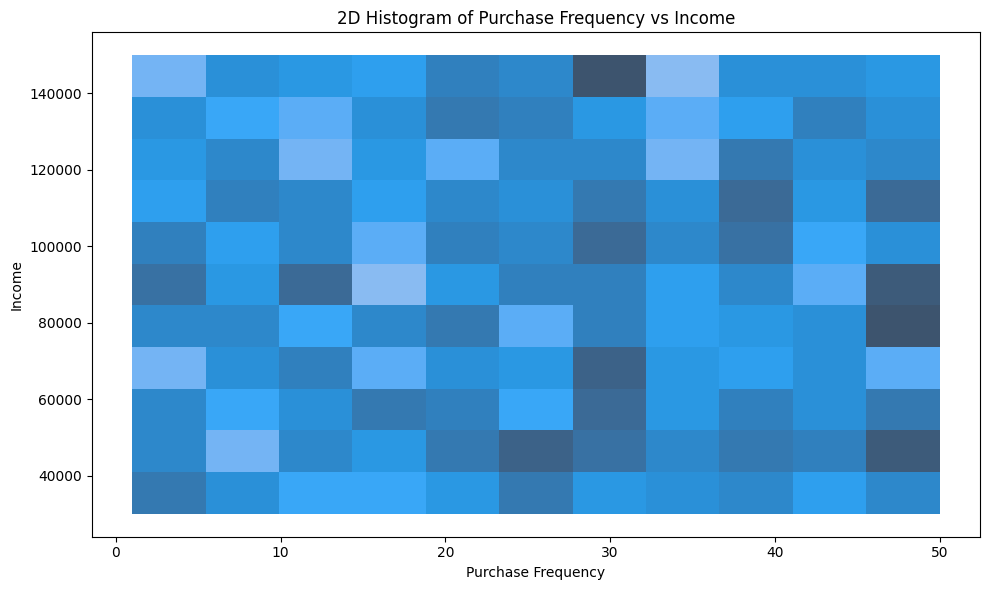

In [15]:
def plot_histogram(df):
    """
    Plots a 2D histogram showing the relationship between purchase frequency and income.

    Parameters:
    df (DataFrame): The input DataFrame containing 'purchase_frequency' and 'income' columns.
    """
    plt.figure(figsize=(10, 6))

    # Create the 2D histogram using seaborn's histplot
    sns.histplot(data=df, x='purchase_frequency', y='income')

    # Add axis labels and title
    plt.xlabel('Purchase Frequency')
    plt.ylabel('Income')
    plt.title('2D Histogram of Purchase Frequency vs Income')

    plt.tight_layout()
    plt.show()
    
    
plot_histogram(df)